# Natural Language Processing
---
### Poetry Generator:

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
  -O /tmp/irish-lyrics-eof.txt

--2020-11-16 11:38:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.002s  

2020-11-16 11:38:17 (43.0 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [2]:
with open('/tmp/irish-lyrics-eof.txt') as f:
  data = f.read()

In [3]:
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [4]:
corpus = data.lower().split('\n')

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index
total_words = len(word_index)+1

print(word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [10]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(i) for i in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre')


xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [11]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [12]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [13]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'sigmoid'))
adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(xs, ys, epochs = 100, verbose = 1)
print(model)

Epoch 1/100
377/377 [==============================] - 22s 57ms/step - loss: 6.8299 - accuracy: 0.0529
Epoch 2/100
377/377 [==============================] - 22s 57ms/step - loss: 6.0442 - accuracy: 0.0659
Epoch 3/100
377/377 [==============================] - 22s 57ms/step - loss: 5.3141 - accuracy: 0.0775
Epoch 4/100
377/377 [==============================] - 22s 58ms/step - loss: 4.5288 - accuracy: 0.1399
Epoch 5/100
377/377 [==============================] - 22s 58ms/step - loss: 3.7525 - accuracy: 0.2226
Epoch 6/100
377/377 [==============================] - 22s 58ms/step - loss: 3.0782 - accuracy: 0.3145
Epoch 7/100
377/377 [==============================] - 22s 58ms/step - loss: 2.5441 - accuracy: 0.4052
Epoch 8/100
377/377 [==============================] - 22s 58ms/step - loss: 2.1762 - accuracy: 0.4728
Epoch 9/100
377/377 [==============================] - 22s 59ms/step - loss: 1.9053 - accuracy: 0.5305
Epoch 10/100
377/377 [==============================] - 22s 58ms/step - l

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

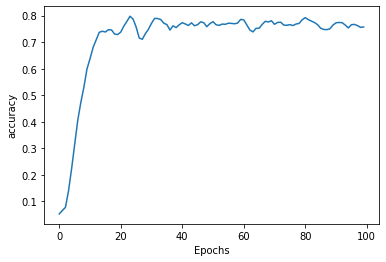

In [17]:
plot_graphs(history, 'accuracy')

In [18]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this one jeremy lanigan oer the hand on gilgarra mountain valley stream laughd easy in killarney saxon and gone and gone by mooncoin my bride by proud saxon back hair they since cross and rest her blind grandmother sitting darling boy get come over by mooncoin gentle now swings now green grow the valley so fair i wonder die but she passed on one better without me toe tree mans corporal casey black is late grief green me too and young round the lark chain aloft in great above by i more rare jewel dead of one star awake our plight
